In [6]:
!pip -q install qpsolvers[open_source_solvers]

In [7]:
from qpsolvers import solve_qp

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
!apt-get install -y -qq coinor-cbc
optCBC = SolverFactory('cbc',executable='/usr/bin/cbc')

NameError: ignored

In [10]:
!apt-get install -y -qq glpk-utils

In [11]:
!pip install -q pyomo
from pyomo.environ import*
import numpy as np

In [12]:
df = pd.read_csv('/content/Lab08_InterestRate (1).csv')

In [13]:
I =np.array(df['Interest Rate'].tolist())
ratio =np.array(df['Ratio'].tolist())
rating = np.array(df['Rating'].tolist())

In [14]:
i=0
P=[[0,0,0],[0,0,0],[0,0,0]]
q=[0,0,0]
d=[]
for i in range(20):
  d.append([1,df.iloc[i,2],df.iloc[i,3]])

D = np.array(d)

P= np.matmul(np.transpose(D),D)*2


In [16]:
P

array([[4.00000000e+01, 1.81496000e+01, 3.35400000e+03],
       [1.81496000e+01, 9.25515268e+00, 1.49040692e+03],
       [3.35400000e+03, 1.49040692e+03, 2.83313880e+05]])

In [17]:
q = -2*np.matmul(np.transpose(I),D)

In [18]:
l= np.array([0,-np.inf,-np.inf])
u =np.array([np.inf,np.inf ,np.inf])

In [19]:
x=solve_qp(P, q, None, None, None, None, l, u, solver = "osqp")
print(x)

[ 0.09128332  0.01686998 -0.00069351]


/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/osqp/utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


In [20]:

mean_square_forecaste_data = []
for i in range(20):
  mean_square_forecaste_data.append((x[0] +x[1]*ratio[i] + x[2]*rating[i]))


In [21]:
mean_square_forecaste_data

[0.03801740022749828,
 0.03230712664476189,
 0.0345694830609893,
 0.03510524261200826,
 0.03746952459904783,
 0.04692287892652262,
 0.04733355457097526,
 0.05118834527128734,
 0.04385999483801497,
 0.044265426443804545,
 0.03663522747444583,
 0.030473421185289104,
 0.031931876942702386,
 0.031528929567609984,
 0.034340419485848976,
 0.04584393663117888,
 0.05040106951957797,
 0.05329525283158571,
 0.044821676045428104,
 0.04543178653346783]

3. Assume you are interested in minimizing the absolute deviation between actual and predicted interest
rates. How will you modify the above formulation? It is known that such an approach will result in a
non-linear program. Use (OP1) or (OP2) approach to determine decision variables.


In [22]:
df

Year  Interest Rate   Ratio  Rating
0   2003         0.0416  0.3615    85.6
1   2004         0.0312  0.2820    91.9
2   2005         0.0354  0.3010    89.1
3   2006         0.0331  0.3862    90.4
4   2007         0.0399  0.3578    86.3
5   2008         0.0501  0.4413    74.7
6   2009         0.0421  0.6753    79.8
7   2010         0.0507  0.6777    74.3
8   2011         0.0431  0.6585    84.4
9   2012         0.0437  0.6702    84.1
10  2013         0.0398  0.3289    86.8
11  2014         0.0274  0.2473    93.7
12  2015         0.0298  0.2762    92.3
13  2016         0.0261  0.3222    94.0
14  2017         0.0358  0.2792    88.9
15  2018         0.0504  0.3609    74.3
16  2019         0.0478  0.6187    74.0
17  2020         0.0549  0.6176    69.8
18  2021         0.0468  0.6004    81.6
19  2022         0.0478  0.6119    81.0

In [23]:
r =np.array(df['Interest Rate'].tolist())
R1 =np.array(df['Ratio'].tolist())
R = np.array(df['Rating'].tolist())

In [24]:
model = ConcreteModel()
m=20   #constraint
n=20
row_indices = np.arange(m)
col_indices = np.arange(n)
model.b = Var(np.arange(3), domain = Reals)
model.u =Var(col_indices)

model.obj = Objective(expr= sum(model.u[i] for i in col_indices), sense = minimize)
model.constraints =ConstraintList()
for i in range(20):
   [model.constraints.add(expr = (model.u[i] ) >= r[i]-(model.b[0] +model.b[1]*R1[i] + model.b[2]*R[i])) ]
   [model.constraints.add(expr = (model.u[i] ) >= -(r[i]-(model.b[0] +model.b[1]*R1[i] + model.b[2]*R[i]))) ]
   [model.constraints.add(expr = model.u[i]>=0)]
   [model.constraints.add(expr = model.b[0]>=0)]
model.pprint()

3 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   80 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

2 Var Declarations
    b : Size=3, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals


In [25]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()
print('\nCost = ', model.obj())
for i in range(20):
  print('u[',i,']=',model.u[i].value)


for i in np.arange(3):
    print('b[',i,']=',model.b[i].value)


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0379290902042735
  Upper bound: 0.0379290902042735
  Number of objectives: 1
  Number of constraints: 80
  Number of variables: 23
  Number of nonzeros: 200
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005048990249633789
# ----------------------------------------------------------
#   Solution Information
# ------

4. Plot your given data along with the predicted data using your decision variables from mean square
deviation and absolute deviation.

In [26]:
b=[]
for i in range(3):
  s= (model.b[i].value)
  b.append(s)


In [27]:
Absolute_forecaste_rate = []
for i in range(20):
  Absolute_forecaste_rate.append(b[0] +b[1]*R1[i] + b[2]*R[i])


In [28]:
x

array([ 0.09128332,  0.01686998, -0.00069351])

In [29]:
Absolute_forecaste_rate

[0.039218701418485505,
 0.03261876090264422,
 0.03539999999999997,
 0.03498407562285702,
 0.03853316743119774,
 0.050099999999999964,
 0.04753497757647719,
 0.052672997756533724,
 0.043099999999999944,
 0.04348796704533045,
 0.037799039119188846,
 0.03062147333572454,
 0.03219271218801448,
 0.03103977596528082,
 0.03538306060477785,
 0.04972350314909578,
 0.05240272847375228,
 0.05629900302767679,
 0.04516341701959853,
 0.04582855885701295]

In [30]:
ActualRate = df['Interest Rate'].tolist()

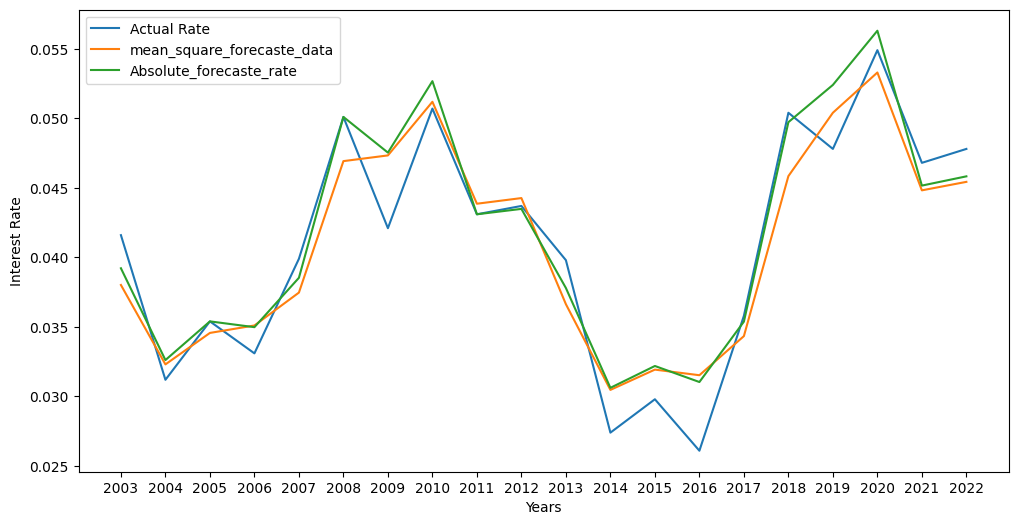

In [31]:
plt.figure(figsize=(12,6))
x=np.linspace(2003,2022,20)

plt.xticks(x)

plt.plot(x,ActualRate, label='Actual Rate')
plt.plot(x,mean_square_forecaste_data, label='mean_square_forecaste_data')
plt.plot(x,Absolute_forecaste_rate, label='Absolute_forecaste_rate')

plt.xlabel('Years')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

**Question 2. Policy Design: Determining Pricing**

In [32]:
#Answer2
P=np.array([[-12982, 0, 0, 0],
            [0, 2400, 0, 0],
            [0, 0, -440, 52.42],
            [0, 0, 52.42, -68.7]])
q=np.array([6748000, 1184000, 420000, 70000])
G=np.array([[-259.66, -1045.5875, 6.655, 9.016],
            [-584.235, -103.74, 10.66, 7.728],
            [6491.5, 0, 0, 0],
            [0, 1200, 0, 0],
            [0, 0, 220, -25.76],
            [0, 34.35, -26.66, 0]])
h=np.array([-781620, -35000, 6748000, 1184000, 420000, 70000 ])
p=solve_qp(P, q, G, h, None, None, None, None, solver = "osqp")
p

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/solvers/osqp_.py:161: UserWarning: OSQP exited with status 'problem non convex'
  warnings.warn(f"OSQP exited with status '{res.info.status}'")


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming optimal_prices contains the optimal prices calculated previously
optimal_prices = p

# Define the range of change in disposable income (-10% to 10%)
disposable_income_change = np.arange(-0.10, 0.06, 0.05)

# Calculate revenue for each change in disposable income
revenues = []
for change in disposable_income_change:
    new_prices = optimal_prices * (1 + change)
    revenue = np.dot(new_prices, np.array([4820, 320, 210,70]))
    revenues.append(revenue)

# Plot the sensitivity curve
plt.figure(figsize=(8, 6))
plt.plot(disposable_income_change * 100, revenues, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Change in disposable income (%)')
plt.ylabel('Revenue')
plt.title('Sensitivity of revenue to changes in disposable income')
plt.grid(True)
plt.show()

TypeError: ignored

**Question 3.A. Three- Portfolio Analysis: Visualizing Trade-of**

Pareto-Frontier Points (Return, Risk):
(0.02204319318396191, 0.020436593383093928)
(0.021685670773904396, 0.020110237575719055)
(0.026257111130913544, 0.019902610014003383)
(0.024981258101837427, 0.019694008518233854)
(0.025221286973385125, 0.019687795366898752)
(0.024214679461026532, 0.019656827577874528)
(0.02436307302636815, 0.01965334876758601)
(0.0240942201700955, 0.019652410367145712)
(0.02425696765219816, 0.01965213469167301)


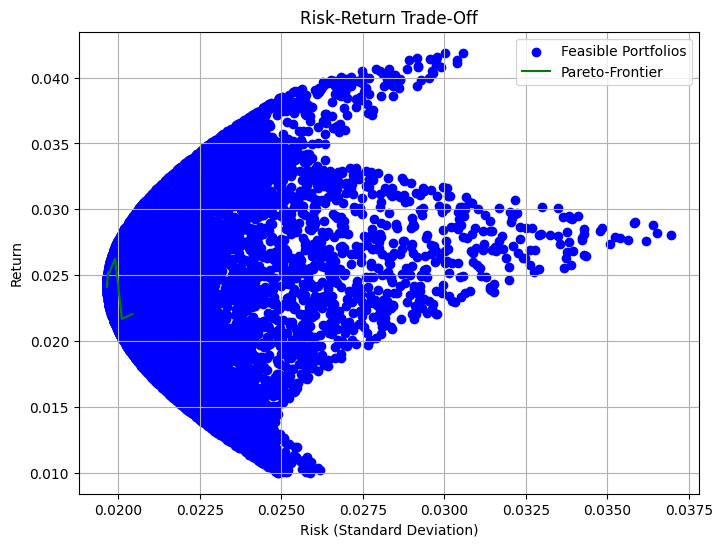

In [34]:
import numpy as np
import matplotlib.pyplot as plt


M = np.array([4.27, 0.15, 2.85]) / 100
Sigma = np.array([[10, 0.18, 0.11],
                  [0.12, 10.44, 0.26],
                  [0.11, 0.26, 14.11]]) / 10000

iterations = 10000

M0 = 0.01

# Random search algorithm
results = []
for _ in range(iterations):
    weights = np.random.rand(3)
    weights /= weights.sum()
    portfolio_return = np.dot(weights, M)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))
    if portfolio_return >= M0:
        results.append((portfolio_return, portfolio_risk))

# Separate the results into return and risk
return_values, risk_values = zip(*results)

# Plot the risk-return trade-off and the Pareto-Frontier
plt.figure(figsize=(8, 6))
plt.scatter(risk_values, return_values, label="Feasible Portfolios", color="blue", marker="o")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")
plt.title("Risk-Return Trade-Off")
plt.grid(True)

# Calculate Pareto-Frontier
pareto_frontier = []
min_risk = float('inf')
for r, risk in results:
    if risk < min_risk:
        pareto_frontier.append((r, risk))
        min_risk = risk

# Separate the Pareto-Frontier into return and risk
pareto_return, pareto_risk = zip(*pareto_frontier)
plt.plot(pareto_risk, pareto_return, label="Pareto-Frontier", color="green", linestyle="-")
plt.legend()

# Print Pareto-Frontier points
print("Pareto-Frontier Points (Return, Risk):")
for point in pareto_frontier:
    print(point)

plt.show()

**Pareto-Frontier**

Text(0.5, 1.0, 'Pareto-Frontier')

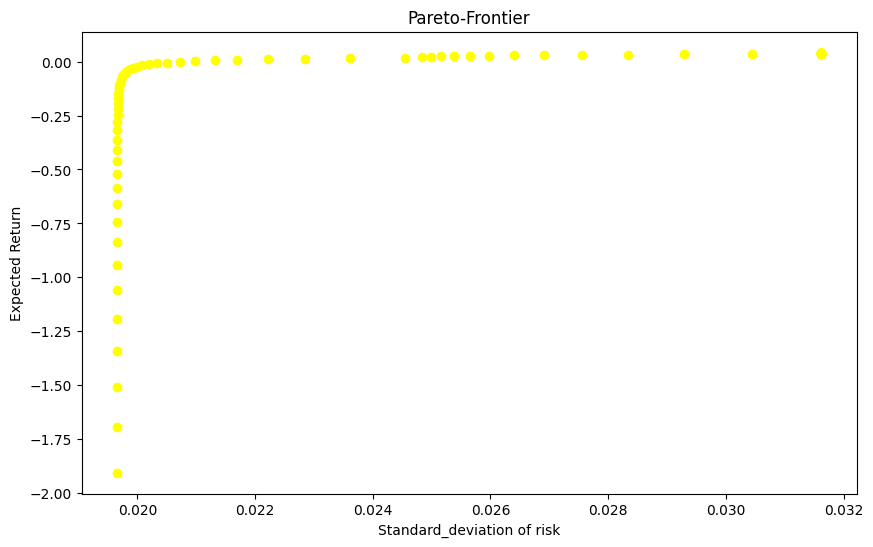

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data
M = np.array([4.27, 0.15, 2.85]) / 100  # Mean returns (as decimals)
Sigma = np.array([[10, 0.18, 0.11],
                  [0.12, 10.44, 0.26],
                  [0.11, 0.26, 14.11]]) / 10000  # Covariance matrix (as decimals)

# Parameters
N = 100  # Number of lambda values to consider
returns = []
risks = []

# Loop through different values of nu to calculate lambda
for nu in range(1, N + 1):
    lambda_val = 10**(5 * (nu / N) - 1)

    # Define utility function to maximize
    def utility(w):
        portfolio_return = np.dot(w, M)
        portfolio_risk = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
        return -portfolio_return + 0.5 * lambda_val * portfolio_risk**2

    # Initial guess for portfolio weights
    initial_weights = np.ones(len(M)) / len(M)

    # Constraints
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                   {'type': 'ineq', 'fun': lambda w: w})

    # Solve the optimization problem
    result = minimize(utility, initial_weights, constraints=constraints)

    # Append results to lists
    returns.append(-result.fun)  # Negative sign due to maximization
    risks.append(np.sqrt(np.dot(result.x.T, np.dot(Sigma, result.x))))

# Plot the Pareto-Frontier trajectory
plt.figure(figsize=(10, 6))
plt.scatter(risks, returns, marker='o', label='Pareto-Frontier', color='yellow')
plt.xlabel('Standard_deviation of risk')
plt.ylabel('Expected Return')
plt.title('Pareto-Frontier')